## Feature Selection Methods for improvment of the model Performance

##### In this example i want to go through the top 4 methods to get the desired result
- Varience Thresehold
- Filter Method
- Recursive Feature Elimination (RFE)
- Brute

##### Importing the dependencies


In [2]:
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

##### Reading the dataset using pandas DataFrame 

In [3]:
wine_data = load_wine()

df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

df.head(3)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
df.shape

(178, 13)

- It is a pretty small dataset which is very useful to  undestand these concept 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


##### Adding our Target column

In [5]:
df['target'] = wine_data.target

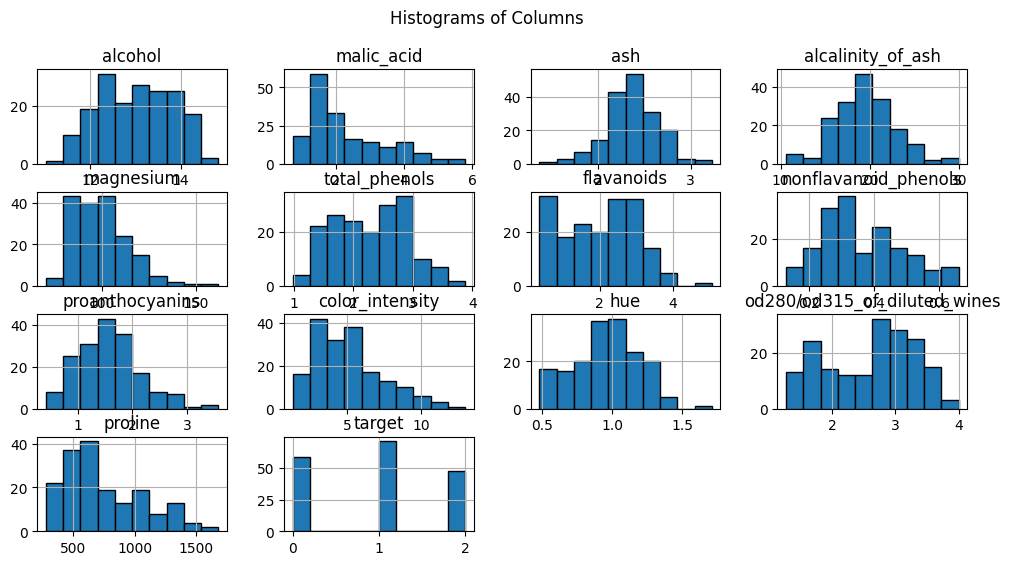

In [6]:
df.hist(bins=10, figsize=(12, 6), edgecolor='black')
plt.suptitle('Histograms of Columns')
plt.show()

##### here I'm going to visualize the dataset distribution of some columns using seaborn swarmplot

C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


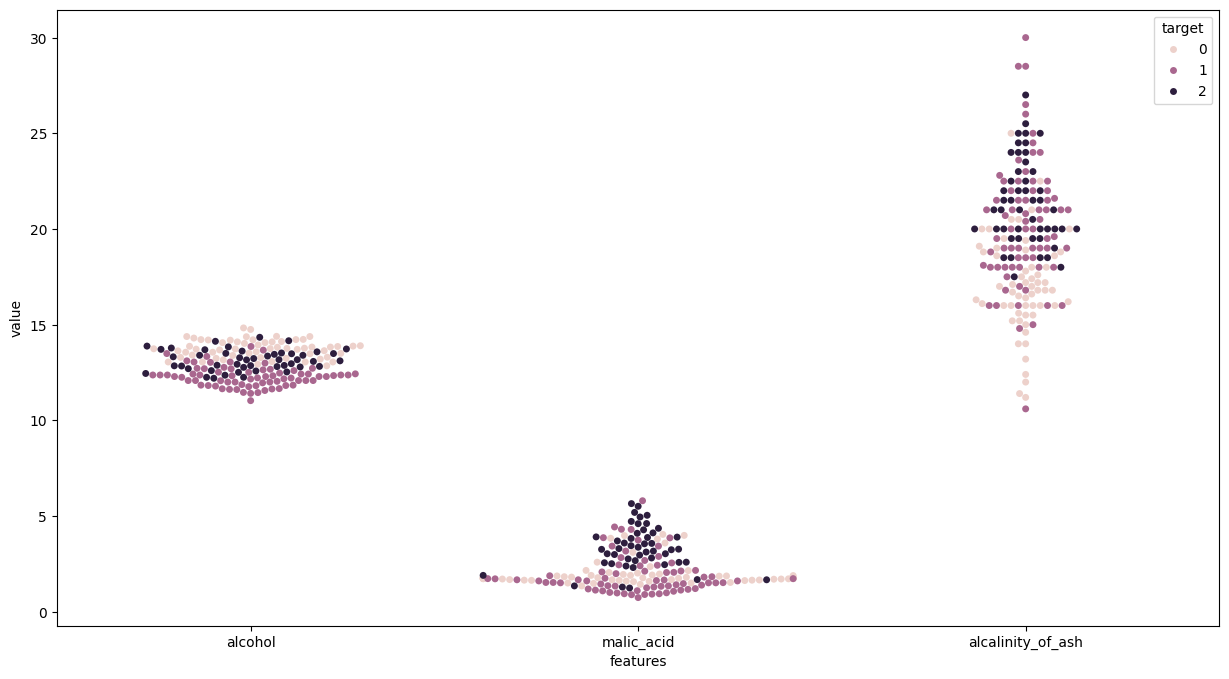

In [7]:
data_to_plot = pd.melt(
    df[["alcohol",'malic_acid', 'alcalinity_of_ash',"target"]], 
    id_vars="target",
      value_name="value",
        var_name="features"
)

plt.figure(figsize=(15, 8))
sns.swarmplot(data=data_to_plot, x="features", y="value", hue="target")
plt.show()

##### Let's visualize the distribution of our Target Column using seaborn bar plot

In [8]:
df["target"].value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

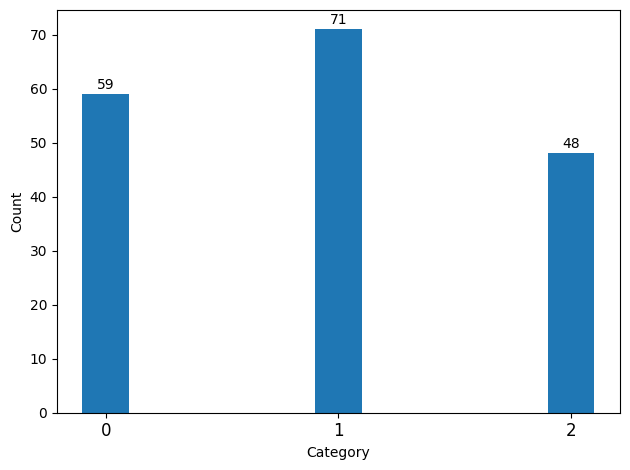

In [9]:
fig, ax = plt.subplots()

x= [0, 1, 2]
y =[59, 71, 48]

ax.bar(x, y, width=0.2)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticks([0,1,2])
ax.set_xticklabels([0,1,2], fontsize=12)

for i , val in enumerate(y):
    plt.text(x=int(i), y=val+1, s=str(val), ha="center")

plt.tight_layout()

### Report
 - It's not very imbalanced data

##### Let's split our dataset using sklearn model_selection class


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((142, 13), (36, 13))

##### Model Building 
 - I prefer to use Gradient Boosting Classifier from sklearn library
 - For Model evaluation , I will use f1_score metrix from sklearn

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initializing the Classifier Model
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train the model with X_trin dataset
gbc.fit(X_train, y_train)

# Make prediction with our X_test dataset
y_preds = gbc.predict(X_test)

# Evaluate the metrix of model performance
f1_score_metrix = round(f1_score(y_test, y_preds, average="weighted"), 3)

print(f1_score_metrix)

0.857


#### Report
- Model's performance is pretty good , but not perform 
- Now, we will apply some methods and technicks to improve the model performance

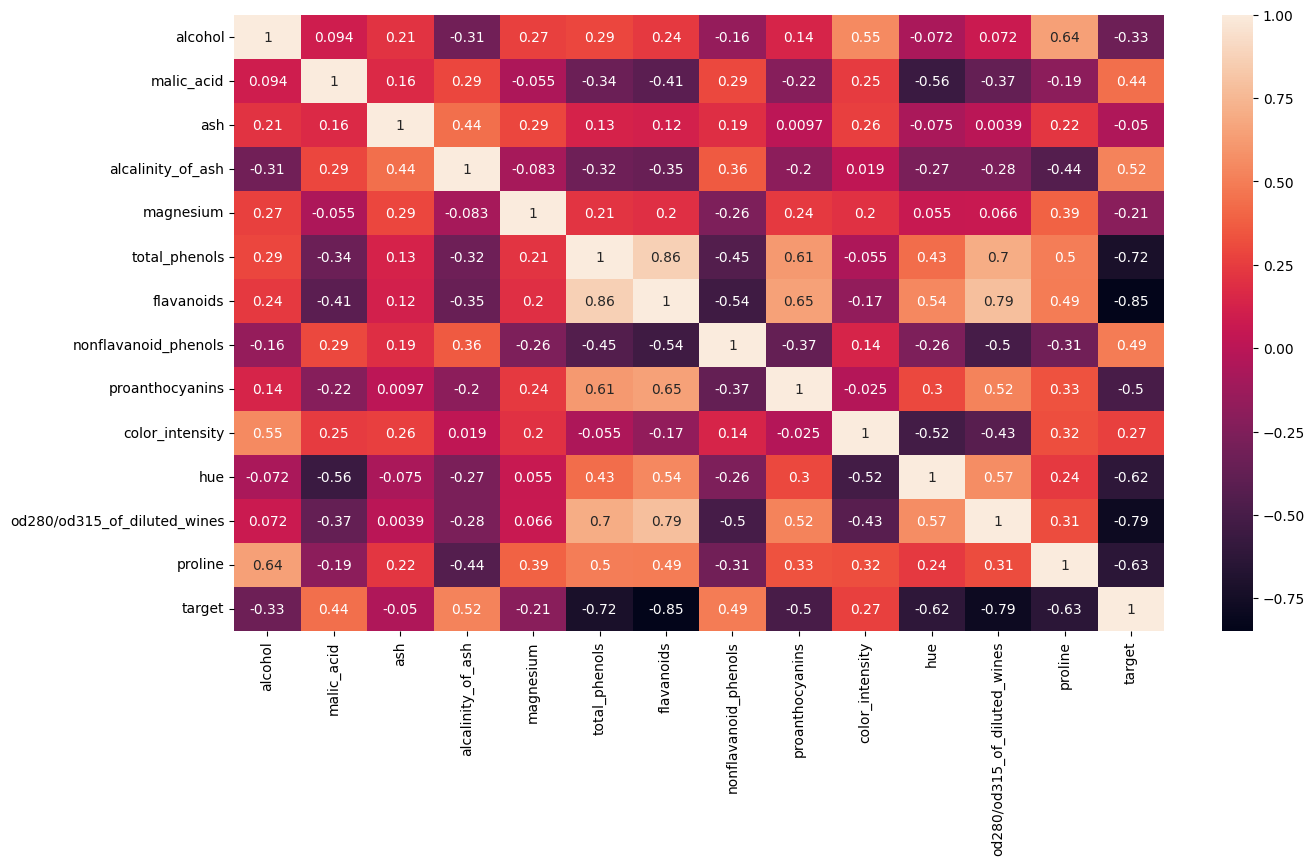

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### First Approach is Varience Threshehol
- What's the Varience Threshehol
- Varience Threshehol is a measure how data is spreaded from the mean
- If a feature has 0, that means it has a constant value, and it is not likely to be helpful to predict the data
- Simple Example: For example, every wine has liquid , knowing that can not be helpful to make accurate predictions

#### Before jumping to the progess , we need to make copyies of X and Y train and test respectively

In [13]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [14]:
X_train_v1.var(axis=0)

alcohol                             0.672590
malic_acid                          1.308585
ash                                 0.077962
alcalinity_of_ash                  11.935591
magnesium                         214.645740
total_phenols                       0.406681
flavanoids                          1.008357
nonflavanoid_phenols                0.016453
proanthocyanins                     0.340654
color_intensity                     5.433176
hue                                 0.054803
od280/od315_of_diluted_wines        0.521487
proline                         91399.556138
dtype: float64

##### Before making a decision based on these varience example, we need to scale the data to avoid feature distribution
- Will use Min Max scaling from sklearn

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

#### Let's Visualize the scalered dataset outcome

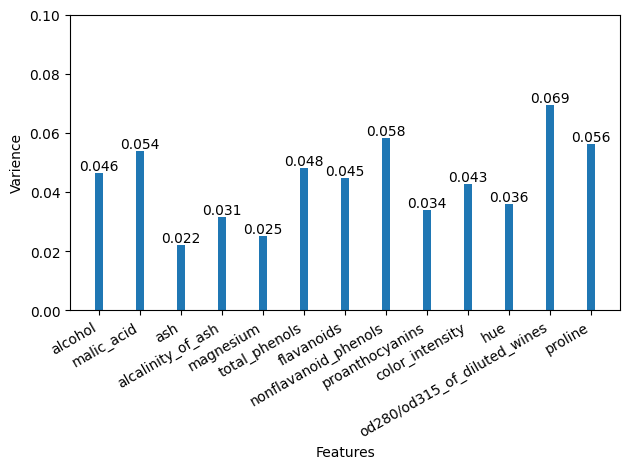

In [16]:
fig, ax = plt.subplots()

x= X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel("Features")
ax.set_ylabel("Varience")
ax.set_ylim(0, 0.1)


for i ,val in enumerate(y):
    plt.text(x=i, y=val+0.001, s=str(round(val, 3)), ha="center")

fig.autofmt_xdate()
plt.tight_layout()


##### Based on the varience result:
- I will drop  the features with threashold below 0.3 , it is subjective , it could be different as weell

In [17]:
sel_X_train_v1 = X_train_v1.drop(['ash','magnesium'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['ash','magnesium'], axis=1)

In [18]:
gbc.fit(sel_X_train_v1, y_train_v1)

y_pred = gbc.predict(sel_X_test_v1)

f1_score_metrix_v1 = round(f1_score(y_test_v1, y_pred, average="weighted"), 3)

print(f"F1 Score Accuracy: {f1_score_metrix_v1 *100}%")
print(f"After applying Feature Selection: Performance Difference: {(f1_score_metrix_v1 - f1_score_metrix)*100} %")

F1 Score Accuracy: 94.39999999999999%
After applying Feature Selection: Performance Difference: 8.699999999999996 %


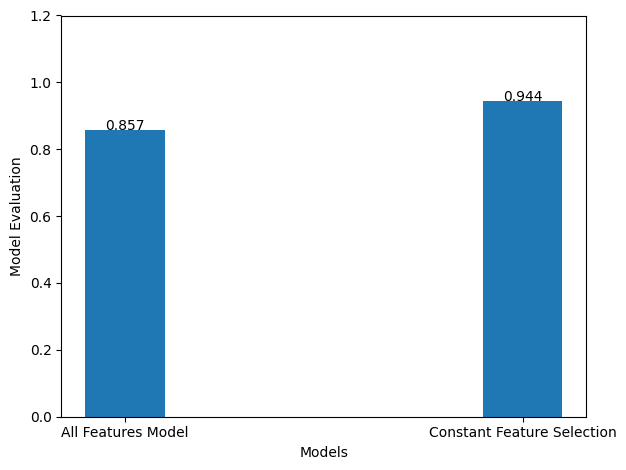

In [19]:
fig, ax = plt.subplots()

x = ["All Features Model", "Constant Feature Selection"]
y = [f1_score_metrix, f1_score_metrix_v1]

ax.bar(x, y, width=0.2)
ax.set_xlabel("Models")
ax.set_ylabel("Model Evaluation")
ax.set_ylim(0, 1.2)

for i, val in enumerate(y):
    plt.text(x=i, y=val+0.001, s=str(round(val, 3)), ha="center")


plt.tight_layout()

#### Report
- After implementing Feature Engineering our model's accuracy grow to 8.69 %

### The second approach is K Filtering method

In [20]:
X_train_2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

##### Will use from low to high to visualize the best performance
- Will use from sklearn feature selection SelectKBest
- For measuring will use mutual_info_classif


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


f1_score_list = []

for k in range(1, 14):
    selecter = SelectKBest(mutual_info_classif, k=k)
    selecter.fit(X_train_2, y_train_v2)

    sel_X_train = selecter.transform(X_train_2)
    sel_X_test = selecter.transform(X_test_v2)

    gbc.fit(sel_X_train, y_train_v2)

    kbest_pred = gbc.predict(sel_X_test)

    f1_score_metrix = round(f1_score(y_test_v2, kbest_pred, average="weighted"), 3)

    f1_score_list.append(f1_score_metrix)

#### Now Let's visualize the result of f1_score of K best Selector

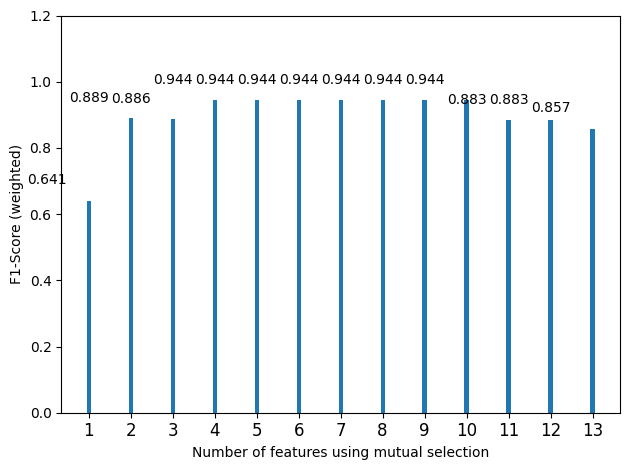

In [28]:
import numpy as np

fig, ax = plt.subplots()

x = np.arange(1, 14)
y = f1_score_list

ax.bar(x, y, width=0.1)
ax.set_xlabel("Number of features using mutual selection")
ax.set_ylabel("F1-Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, val in enumerate(y):
    plt.text(x=i, y=val+0.05, s=str(val), ha="center")


plt.tight_layout()

#### Wrapped Method (Recursive Feautere Elimination)
- This methods uses the model to calculate feature importance

In [29]:
X_train_3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [30]:
from sklearn.feature_selection import RFE

f1_score_list= []

for k in range(1, 14):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_3, y_train_v3)

    sel_X_train = RFE_selector.transform(X_train_3)
    sel_X_test = RFE_selector.transform(X_test_v3)

    gbc.fit(sel_X_train, y_train_v3)

    y_pred = gbc.predict(sel_X_test)

    f1_score_metrix = round(f1_score(y_test_v3, y_pred,average="weighted"),3)

    f1_score_list.append(f1_score_metrix)


f1_score_list

[0.748,
 0.887,
 0.909,
 0.944,
 0.857,
 0.83,
 0.83,
 0.83,
 0.857,
 0.857,
 0.857,
 0.857,
 0.857]